In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor


In [2]:
#import data Train set
data = pd.read_csv('../train_set.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,id,limit_bal,sex,education,marriage,age,pay_september,pay_august,...,bill_june,bill_may,bill_april,pay_amt_september,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default
0,22788,22790,22789,160000,2,2,2,33,2,2,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
1,29006,29008,29007,150000,2,1,2,34,1,-1,...,0,0,0,53,0,0,0,0,0,0
2,16950,16952,16951,10000,1,2,1,50,1,2,...,8067,8227,8400,2,1281,1134,294,305,1000,0
3,22280,22282,22281,220000,2,1,2,29,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
4,11346,11348,11347,310000,2,1,2,32,1,-2,...,326,-235,-235,0,326,0,0,0,1200,0


In [3]:
# train data set summery
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 27 columns):
Unnamed: 0           24000 non-null int64
Unnamed: 0.1         24000 non-null int64
id                   24000 non-null int64
limit_bal            24000 non-null int64
sex                  24000 non-null int64
education            24000 non-null int64
marriage             24000 non-null int64
age                  24000 non-null int64
pay_september        24000 non-null int64
pay_august           24000 non-null int64
pay_july             24000 non-null int64
pay_june             24000 non-null int64
pay_may              24000 non-null int64
pay_april            24000 non-null int64
bill_september       24000 non-null int64
bill_august          24000 non-null int64
bill_july            24000 non-null int64
bill_june            24000 non-null int64
bill_may             24000 non-null int64
bill_april           24000 non-null int64
pay_amt_september    24000 non-null int64
pay_amt_a

In [4]:
# variable standrization in X & Y terms.......
x = data.iloc[:,3:-1]
y = data['default']

In [5]:
# numerical variables for corr
x_for_cor = x[['limit_bal','age','pay_september','pay_august','pay_july','pay_june','pay_may','pay_april','bill_september','bill_august','bill_july','bill_june','bill_may','bill_april','pay_amt_september','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april']]

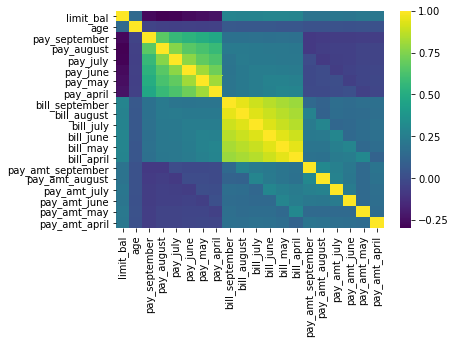

In [6]:
# correlation heat map 
sns.heatmap(x_for_cor.corr(), cmap='viridis')

In [ ]:
# Var ranking throuh Random Forest.........
names = data[['limit_bal','sex' ,'education','marriage','age','pay_september','pay_august','pay_july','pay_june','pay_may','pay_april','bill_september','bill_august','bill_july','bill_june','bill_may','bill_april','pay_amt_september','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april']]
rf = RandomForestRegressor()
rf.fit(x, y)
print ("Features sorted by their score: \n")
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),names), reverse=True)

Features sorted by their score: 

[(0.1593, 'pay_september'), (0.0728, 'age'), (0.065, 'bill_september'), (0.0602, 'limit_bal'), (0.0561, 'pay_amt_july'), (0.0539, 'pay_amt_august'), (0.0529, 'pay_amt_april'), (0.0494, 'pay_amt_september'), (0.0465, 'bill_april'), (0.0457, 'bill_august'), (0.0444, 'pay_amt_june'), (0.0436, 'bill_june'), (0.0421, 'pay_amt_may'), (0.0419, 'bill_may'), (0.0419, 'bill_july'), (0.0359, 'pay_august'), (0.0206, 'education'), (0.0128, 'marriage'), (0.0127, 'sex'), (0.0111, 'pay_april'), (0.0109, 'pay_june'), (0.0106, 'pay_may'), (0.0098, 'pay_july')]


In [ ]:
#np.corrcoef(x_for_cor)
np.corrcoef(x_for_cor)

In [ ]:
#correlation matrix
x_for_cor.corr()